In [25]:
import yfinance as yf
import pandas as pd

# Define the stock symbol and the recent date range
stock_symbol = 'AAPL'  # Change to the stock you want to analyze
start_date = '2024-09-18'  # Adjust to match the news API start date
end_date = '2024-10-15'  # Current date, or adjust as needed

# Fetch the stock data from Yahoo Finance
stock_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Check the first few rows of the data
print(stock_data.head())

# Save the stock data to CSV for future use
stock_data.to_csv('historical_stock_data.csv')


[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open     Volume
Ticker            AAPL        AAPL        AAPL        AAPL       AAPL
Date                                                                 
2024-09-18  220.205353  222.220921  217.062261  217.072249   59894900
2024-09-19  228.367386  229.315312  224.136707  224.495917   66781300
2024-09-20  227.698853  232.578113  227.120124  229.464970  318679900
2024-09-23  225.972656  228.946108  225.314102  226.840741   54146000
2024-09-24  226.870682  228.846345  225.234284  228.147870   43556100


In [2]:
import requests
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd

# NewsAPI configuration
api_key = 'fa5b58e3a9194da6bdbee7e966612157'
search_query = 'Apple'  # Change to the stock/company you're interested in
# Adjust the date to 2024-09-18 or later to fit within the free plan limits
url = f'https://newsapi.org/v2/everything?q={search_query}&from=2024-09-18&sortBy=publishedAt&apiKey={api_key}'

# Fetch news data
response = requests.get(url)
news_data = response.json()

# Debugging: Print the full response from the API
print(news_data)

# Check if 'articles' is in the response
if 'articles' in news_data:
    # Initialize VADER sentiment analyzer
    analyzer = SentimentIntensityAnalyzer()

    # Analyze sentiment of each headline
    news_sentiments = []
    for article in news_data['articles']:
        title = article['title']
        sentiment_score = analyzer.polarity_scores(title)['compound']
        news_sentiments.append({'title': title, 'sentiment': sentiment_score})

    # Create a DataFrame
    news_df = pd.DataFrame(news_sentiments)

    # Save the data to CSV
    news_df.to_csv('news_sentiment_data.csv', index=False)

    print(news_df.head())
else:
    print("No articles found or an error occurred.")


{'status': 'error', 'code': 'parameterInvalid', 'message': 'You are trying to request results too far in the past. Your plan permits you to request articles as far back as 2025-04-01, but you have requested 2024-09-18. You may need to upgrade to a paid plan.'}
No articles found or an error occurred.


In [6]:
import pandas as pd

# Load stock data and sentiment data
# Load stock data correctly by ensuring proper headers
stock_data = pd.read_csv('historical_stock_data.csv')

# Ensure the 'Date' column is properly named and formatted
if 'Date' not in stock_data.columns:
    stock_data.reset_index(inplace=True)  # Reset index to move the date index to a column
    stock_data.rename(columns={'index': 'Date'}, inplace=True)

sentiment_data = pd.read_csv('news_sentiment_data.csv')

# Print column names to debug the issue
print("Stock data columns:", stock_data.columns)
print("Sentiment data columns:", sentiment_data.columns)

# Assuming the sentiment data might lack dates, we check for the Date column
# Add a 'Date' column with actual dates if unavailable
if 'Date' not in sentiment_data.columns:
    sentiment_data['Date'] = pd.to_datetime('2024-10-15')  # Placeholder

# Convert 'Date' column to datetime in both datasets
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
sentiment_data['Date'] = pd.to_datetime(sentiment_data['Date'])

# Merge datasets on 'Date' with an outer join to keep all data points
combined_data = pd.merge(stock_data, sentiment_data, on='Date', how='outer')

# Only keep weekdays (Monday to Friday)
combined_data = combined_data[combined_data['Date'].dt.weekday < 5]

# Sort by Date before filling missing sentiment data
combined_data.sort_values(by='Date', inplace=True)

# Forward fill and backward fill for missing sentiment values
combined_data['sentiment'].ffill(inplace=True)  # Forward fill
combined_data['sentiment'].bfill(inplace=True)  # Backward fill

# Export the combined data for further use
combined_data.to_csv('combined_stock_sentiment_data.csv', index=False)

print("\nCombined Data:")
print(combined_data)

Stock data columns: Index(['Date', 'Price', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
Sentiment data columns: Index(['title', 'sentiment'], dtype='object')


C:\Users\DELL\AppData\Local\Temp\ipykernel_6264\485487983.py:37: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  combined_data['sentiment'].ffill(inplace=True)  # Forward fill
C:\Users\DELL\AppData\Local\Temp\ipykernel_6264\485487983.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy


Combined Data:
                             Date       Price               Close  \
0   1970-01-01 00:00:00.000000000      Ticker                AAPL   
1   1970-01-01 00:00:00.000000001        Date                 NaN   
2   1970-01-01 00:00:00.000000002  2024-09-18  220.20535278320312   
3   1970-01-01 00:00:00.000000003  2024-09-19   228.3673858642578   
4   1970-01-01 00:00:00.000000004  2024-09-20   227.6988525390625   
..                            ...         ...                 ...   
48  2024-10-15 00:00:00.000000000         NaN                 NaN   
47  2024-10-15 00:00:00.000000000         NaN                 NaN   
46  2024-10-15 00:00:00.000000000         NaN                 NaN   
56  2024-10-15 00:00:00.000000000         NaN                 NaN   
120 2024-10-15 00:00:00.000000000         NaN                 NaN   

                   High                 Low                Open     Volume  \
0                  AAPL                AAPL                AAPL       AAPL   

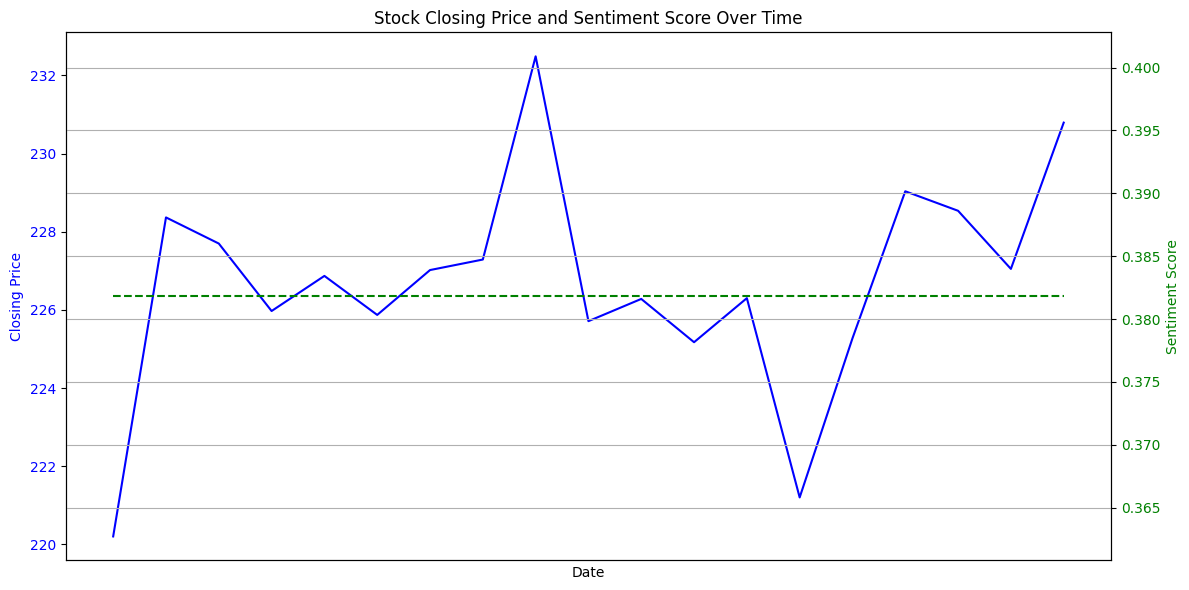

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the combined dataset
data = pd.read_csv('combined_stock_sentiment_data.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check if required columns exist
required_columns = ['Close', 'sentiment']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing required column: {col}")

# Ensure 'Close' and 'sentiment' columns are numeric
data['Close'] = pd.to_numeric(data['Close'], errors='coerce')  # Convert to numeric, set invalid values to NaN
data['sentiment'] = pd.to_numeric(data['sentiment'], errors='coerce')  # Convert to numeric, set invalid values to NaN

# Drop rows with NaN values in 'Close' or 'sentiment'
data.dropna(subset=['Close', 'sentiment'], inplace=True)

# Create a figure and a set of subplots with dual axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the stock closing price on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('Closing Price', color='blue')
ax1.plot(data.index, data['Close'], color='blue', label='Stock Closing Price')
ax1.tick_params(axis='y', labelcolor='blue')

# Create another y-axis for sentiment on the right side
ax2 = ax1.twinx()
ax2.set_ylabel('Sentiment Score', color='green')
ax2.plot(data.index, data['sentiment'], color='green', label='Sentiment Score', linestyle='--')
ax2.tick_params(axis='y', labelcolor='green')

# Title and grid
plt.title('Stock Closing Price and Sentiment Score Over Time')
fig.tight_layout()
plt.grid(True)

# Show plot
plt.show()

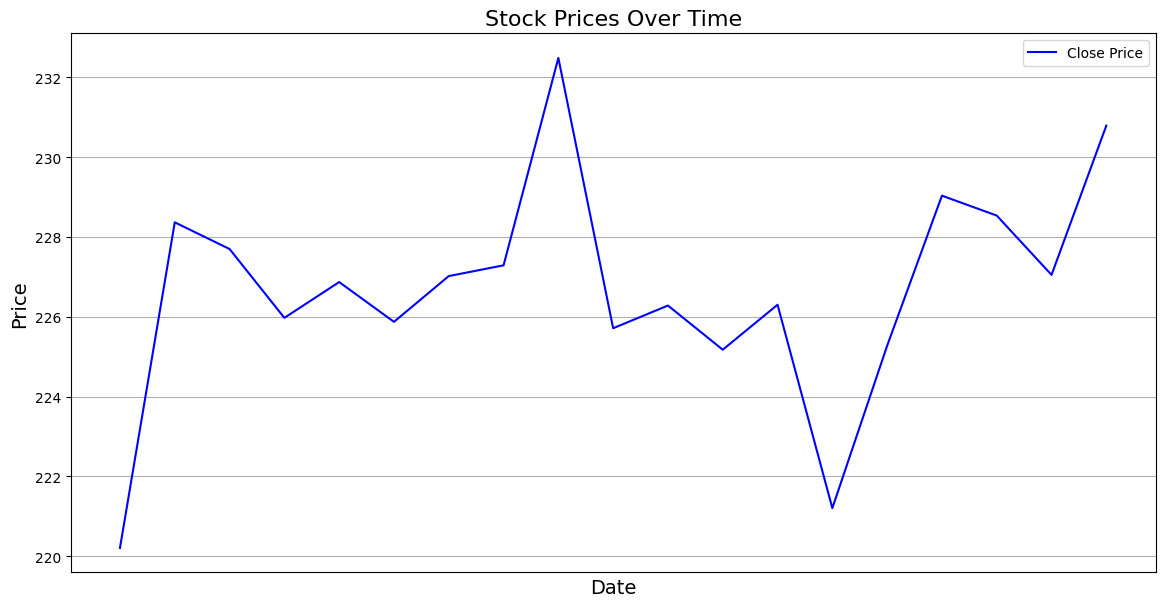

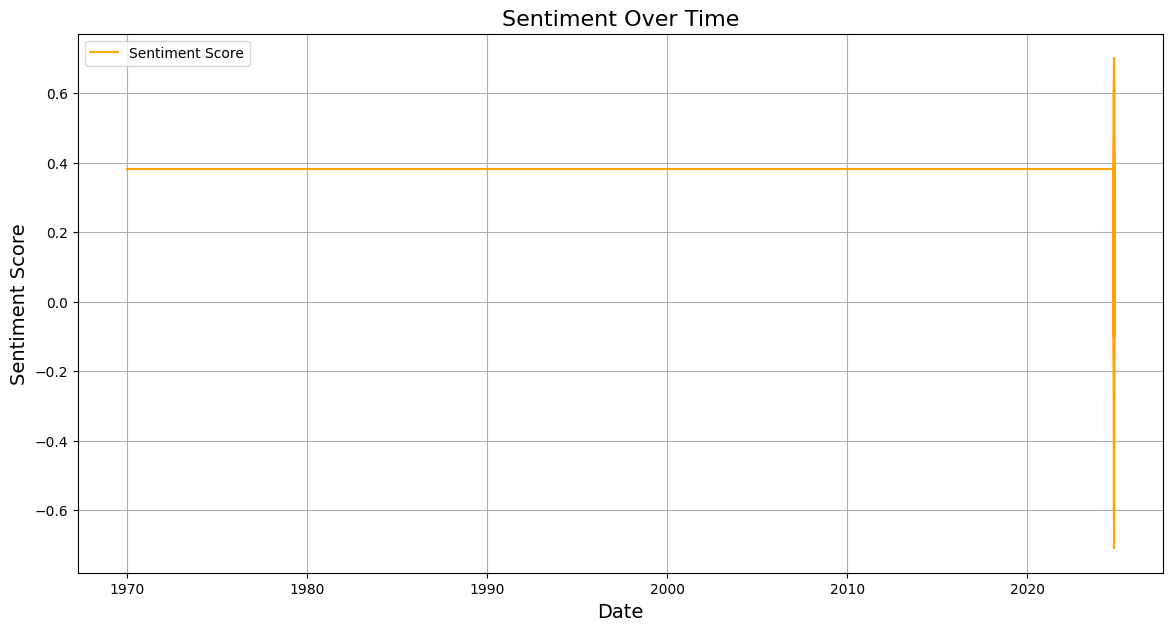

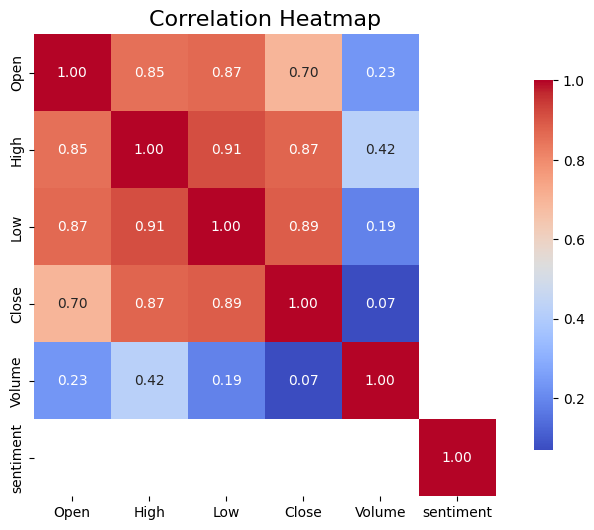

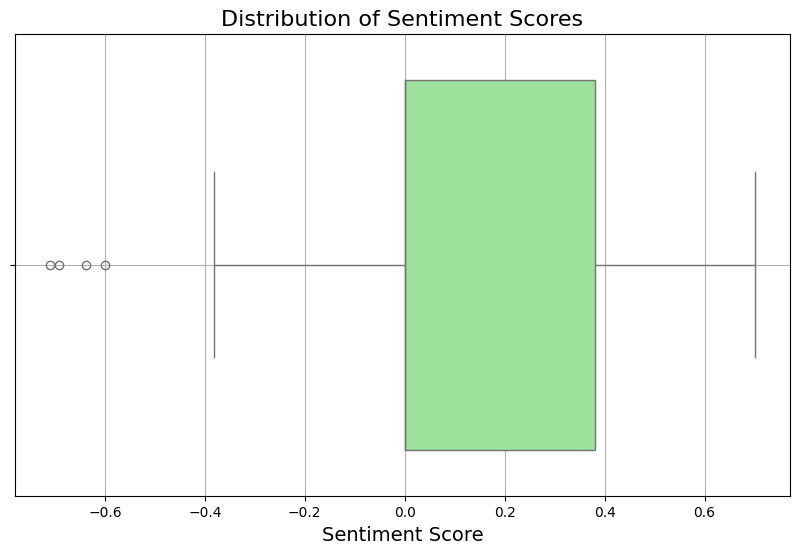

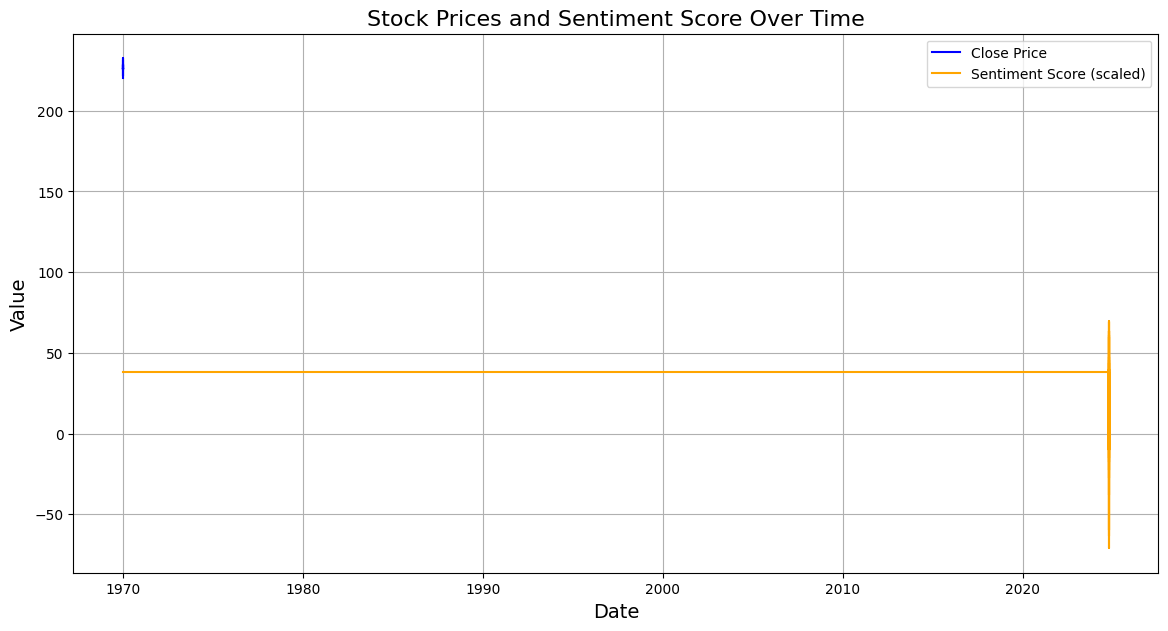

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
data = pd.read_csv('combined_stock_sentiment_data.csv')

# Ensure the 'Date' column is in datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# Check if required columns exist
required_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment']
for col in required_columns:
    if col not in data.columns:
        raise ValueError(f"Missing required column: {col}")

# Convert numeric columns to appropriate types
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# 1. Time Series Plot for Stock Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Stock Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# 2. Time Series Plot for Sentiment
plt.figure(figsize=(14, 7))
plt.plot(data['sentiment'].astype(float), label='Sentiment Score', color='orange')  # Ensure 'sentiment' is float
plt.title('Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = data[['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Box Plot for Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sentiment'], color='lightgreen')
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.grid()
plt.show()

# 5. Combined Plot of Stock Prices and Sentiment
plt.figure(figsize=(14, 7))
plt.plot(data['Close'].astype(float), label='Close Price', color='blue')  # Ensure 'Close' is float
plt.plot(data['sentiment'].astype(float) * 100, label='Sentiment Score (scaled)', color='orange')  # Ensure 'sentiment' is float and scale it
plt.title('Stock Prices and Sentiment Score Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid()
plt.show()

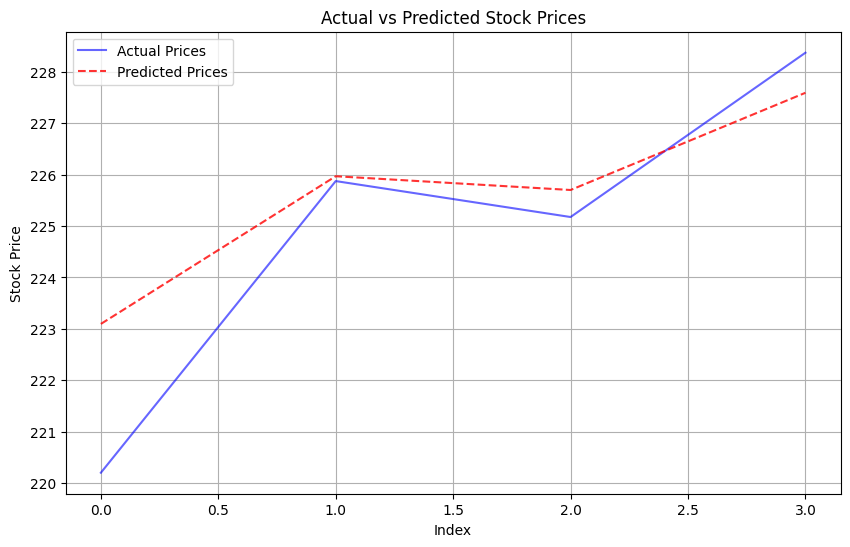

C:\Users\DELL\AppData\Local\Temp\ipykernel_6264\3900703401.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=features, palette='viridis')


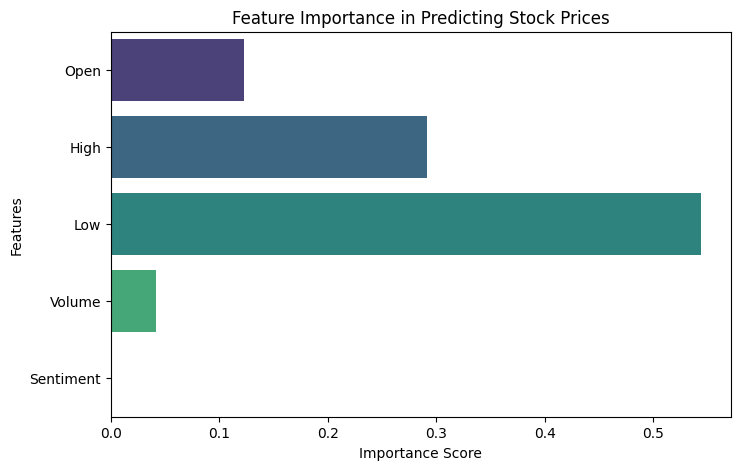

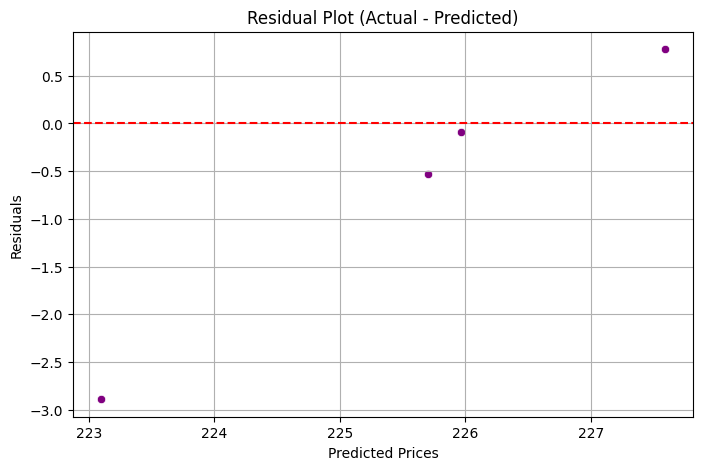

Mean Squared Error: 2.3130192450351084
R^2 Score: 0.7362891326255473


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load the combined dataset
data = pd.read_csv('combined_stock_sentiment_data.csv')

# Prepare the features (X) and target (y)
X = data[['Open', 'High', 'Low', 'Volume', 'sentiment']].apply(pd.to_numeric, errors='coerce')  # Convert to numeric
y = pd.to_numeric(data['Close'], errors='coerce')  # Convert target to numeric

# Drop rows with NaN values in either X or y
X = X.dropna()
y = y[X.index]  # Ensure y matches the cleaned X

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Plot 1: Actual vs Predicted Stock Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='Actual Prices', color='blue', alpha=0.6)
plt.plot(y_pred, label='Predicted Prices', color='red', linestyle='--', alpha=0.8)
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Index')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Feature Importance
importances = model.feature_importances_
features = ['Open', 'High', 'Low', 'Volume', 'Sentiment']
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=features, palette='viridis')
plt.title('Feature Importance in Predicting Stock Prices')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Plot 3: Residual Plot (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_pred, y=residuals, color='purple')
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot (Actual - Predicted)')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

# Additional Print Statements (Performance Metrics)
print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


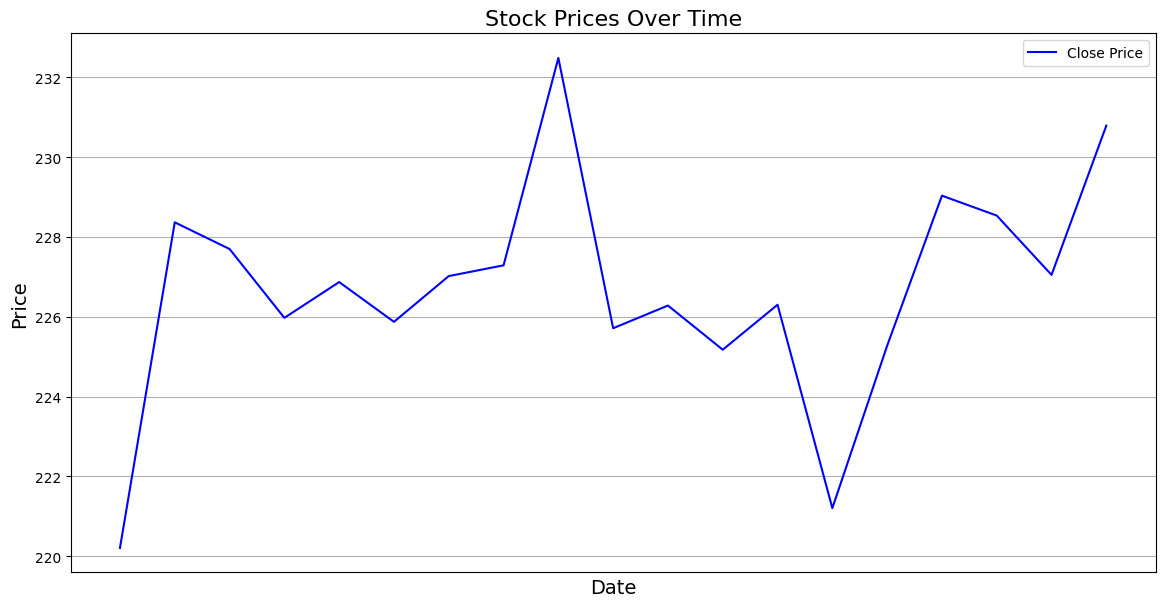

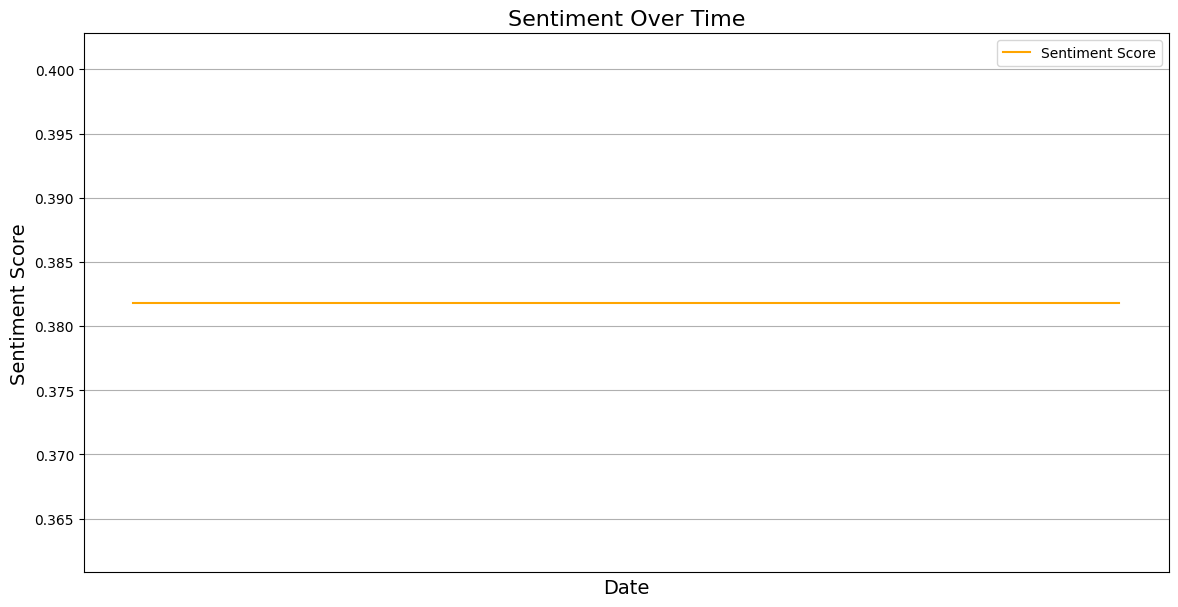

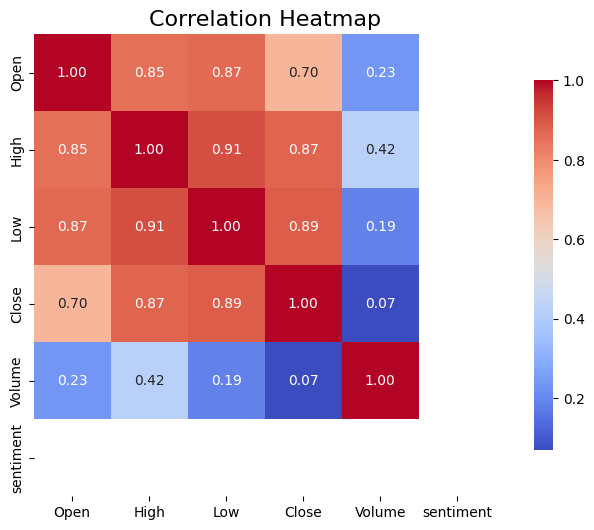

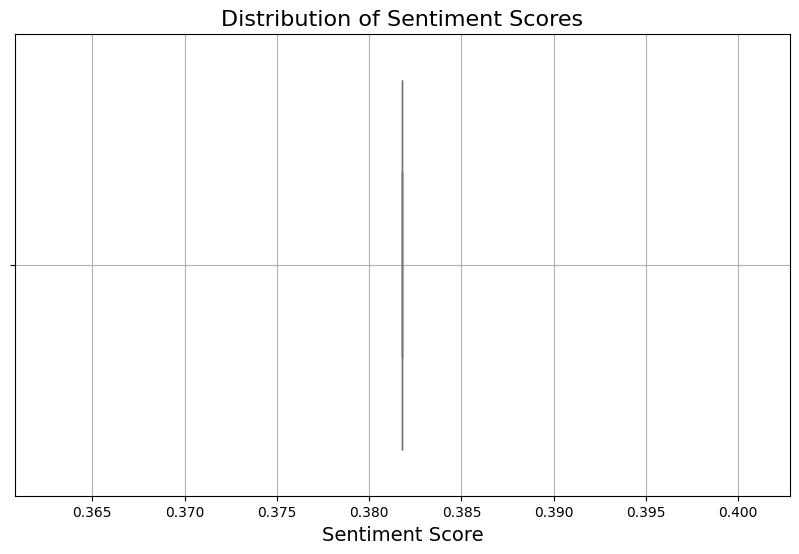

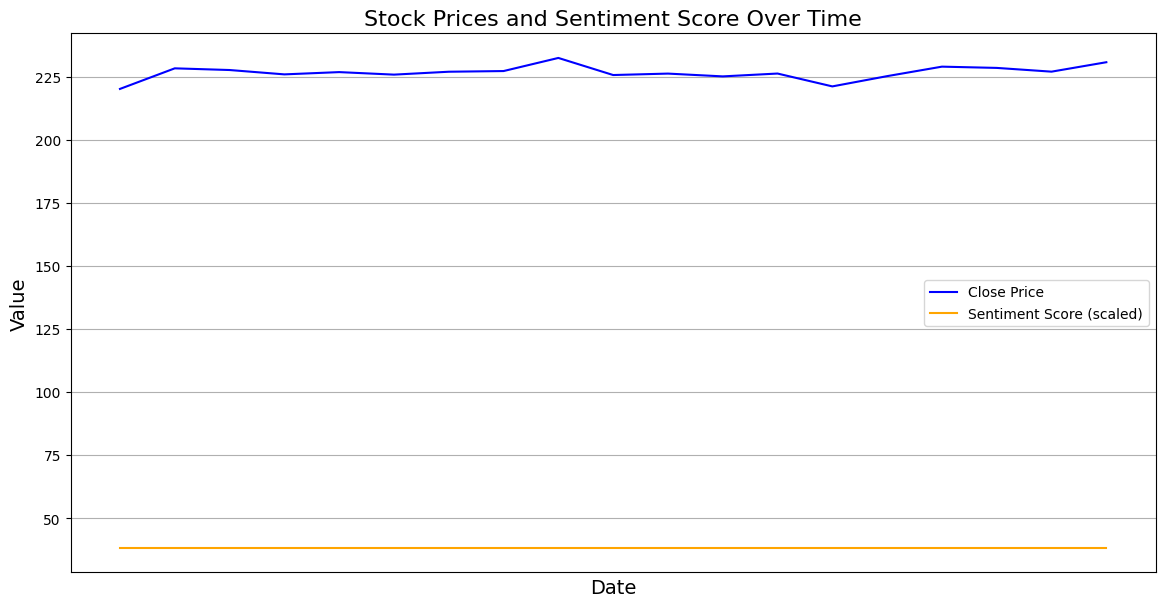

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the combined dataset
data = pd.read_csv('combined_stock_sentiment_data.csv')

# Convert the 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Ensure numeric columns are properly converted
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment']
for col in numeric_columns:
	data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop rows with NaN values in essential columns
data.dropna(subset=['Close', 'sentiment'], inplace=True)

# Set the 'Date' column as the index
data.set_index('Date', inplace=True)

# 1. Time Series Plot for Stock Prices
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.title('Stock Prices Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# 2. Time Series Plot for Sentiment
plt.figure(figsize=(14, 7))
plt.plot(data['sentiment'], label='Sentiment Score', color='orange')
plt.title('Sentiment Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Sentiment Score', fontsize=14)
plt.legend()
plt.grid()
plt.show()

# 3. Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation = data[['Open', 'High', 'Low', 'Close', 'Volume', 'sentiment']].corr()
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

# 4. Box Plot for Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(x=data['sentiment'], color='lightgreen')
plt.title('Distribution of Sentiment Scores', fontsize=16)
plt.xlabel('Sentiment Score', fontsize=14)
plt.grid()
plt.show()

# 5. Combined Plot of Stock Prices and Sentiment
plt.figure(figsize=(14, 7))
plt.plot(data['Close'], label='Close Price', color='blue')
plt.plot(data['sentiment'] * 100, label='Sentiment Score (scaled)', color='orange')  # Scale sentiment for better visibility
plt.title('Stock Prices and Sentiment Score Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.legend()
plt.grid()
plt.show()
